In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import os
import torch
from os.path import join
import json
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'
plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman')

yaxisfont=45
bigfont = 27 + 5
medfont = 20 + 5
smallfont = 17
import sys
plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})
sns.set_palette("muted")
from collections import defaultdict
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18
import copy
import random


/data/yefan0726/anaconda3/envs/ww_prune/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
palettes = [sns.color_palette('pastel')[0], 
            sns.color_palette('Set2')[-2], 
            sns.color_palette("Set2")[1],
            sns.color_palette('flare')[2], 
            sns.color_palette("tab10")[4]]  

marker_type_lst = ['o', 'v', '*']

[53.54760461 53.54760461 53.54760461 53.54760461] [0. 0. 0. 0.]
[ 166.8  334.   500.6  668.2  834.6 1001.8 1169.2 1335.8 1502.  1669. ]
[55.79138872 68.13826562 67.22862341 67.2650091 ] [2.60862802 6.95767348 0.76284707 0.99896957]
[ 166.8  334.   500.6  668.2  834.6 1001.8 1169.2 1335.8 1502.  1669. ]
[74.1055185  75.41540327 76.88295937 77.84111583] [2.04250183 1.90985394 3.54817989 1.76702795]
[ 166.8  334.   500.6  668.2  834.6 1001.8 1169.2 1335.8 1502.  1669. ]


Text(0.5, 0, 'Number of trained models used')

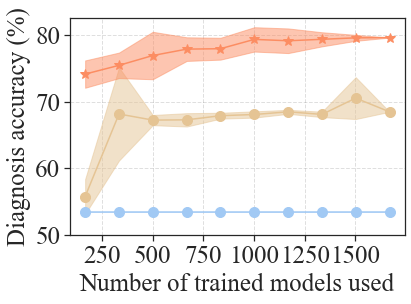

In [4]:
base_folder = 'results/width_vs_batch/dataset_transfer'

hyper_tree_random = np.load(f'../{base_folder}/hyperparameter_tree_random_data.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
print(xticks)

plt.plot(xticks, mean_values, color=palettes[0], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[0])

hyper_tree_random = np.load(f'../{base_folder}/validation_metric_tree_random_data.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
print(xticks)

plt.plot(xticks, mean_values, color=palettes[1], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[1])


hyper_tree_random = np.load(f'../{base_folder}/md_tree_random_data.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
print(xticks)

plt.plot(xticks, mean_values, color=palettes[2], marker=marker_type_lst[2], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[2])

yticks= [0.5, 0.6, 0.7, 0.8]
#plt.ylim([0.5, 0.92])
plt.xticks([250, 500, 750, 1000, 1250, 1500])
plt.yticks(yticks, [int(item) for item in 100 * np.array(yticks)] )

plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.ylabel('Diagnosis accuracy (%)', fontsize=25)
plt.xlabel('Number of trained models used', fontsize=25)

Text(0.5, 0, 'Number of trained models used')

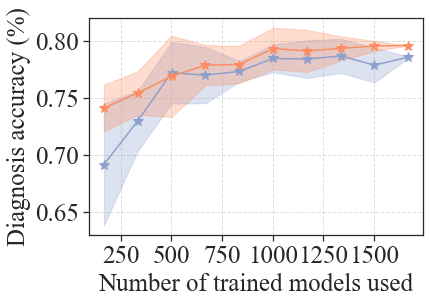

In [9]:
base_folder = 'results/width_vs_batch/dataset_transfer'

color = sns.color_palette("Set2")[2]
hyper_tree_random = np.load(f'../{base_folder}/loss_landscape_metric_tree_random_data.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)
plt.plot(xticks, mean_values, color=color, marker=marker_type_lst[2], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.3, 
                    color=color)


hyper_tree_random = np.load(f'../{base_folder}/md_tree_random_data.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
#xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)
plt.plot(xticks, mean_values, color=palettes[2], marker=marker_type_lst[2], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.3, 
                    color=palettes[2])

#yticks= [0.5, 0.6, 0.7, 0.8]
#plt.ylim([0.5, 0.92])
plt.xticks([250, 500, 750, 1000, 1250, 1500])
#plt.yticks(yticks, [int(item) for item in 100 * np.array(yticks)] )

plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.ylabel('Diagnosis accuracy (%)', fontsize=25)
plt.xlabel('Number of trained models used', fontsize=25)

[53.54760461 53.54760461 53.54760461 53.54760461] [0. 0. 0. 0.]
[63.6143117  73.00181928 73.94784718 74.89387508] [1.79527312 0.38621427 0.02970879 0.        ]
[78.16858702 80.89751364 79.50272893 79.50272893] [0. 0. 0. 0.]


Text(0, 0.5, 'Diagnosis accuracy (%)')

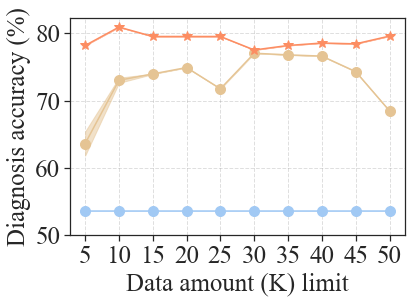

In [5]:
trainset_sizes = range(1, 11, 1)
base_folder = 'results/width_vs_batch/scale_transfer'



xticks = [item * 5 for item in trainset_sizes]


hyper_tree_random = np.load(f'../{base_folder}/hyperparameter_tree_data_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
plt.plot(xticks, mean_values, color=palettes[0], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, mean_values-std_values,
                    mean_values+std_values,
                    color=palettes[0], 
                    alpha=0.5)


hyper_tree_random = np.load(f'../{base_folder}/validation_metric_tree_data_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
plt.plot(xticks, mean_values, color=palettes[1], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, mean_values-std_values,
                    mean_values+std_values,
                    color=palettes[1], 
                    alpha=0.5)



hyper_tree_random = np.load(f'../{base_folder}/md_tree_data_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)

print(np.array(mean_values[:4])*100, np.array(std_values[:4])*100)
plt.plot(xticks, mean_values, color=palettes[2], marker=marker_type_lst[2], markersize=10)
plt.fill_between(xticks, mean_values-std_values,
                    mean_values+std_values,
                    color=palettes[2], 
                     alpha=0.5)

plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

yticks= [0.5, 0.6, 0.7, 0.8]
plt.yticks(yticks, [int(item) for item in 100 * np.array(yticks)] )
plt.xticks(xticks, xticks)
plt.xlabel('Data amount (K) limit', fontsize=25)
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Diagnosis accuracy (%)', fontsize=25)


Text(0.5, 0, 'Number of trained models used')

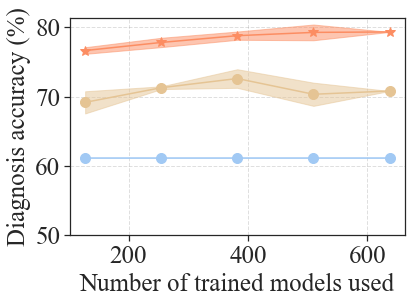

In [16]:
base_folder = 'results/data_vs_batch/dataset_transfer'

hyper_tree_random = np.load(f'../{base_folder}/hyperparameter_tree_random_width.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)

plt.plot(xticks, mean_values, color=palettes[0], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[0])


hyper_tree_random = np.load(f'../{base_folder}/validation_metric_tree_random_width.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)

plt.plot(xticks, mean_values, color=palettes[1], marker=marker_type_lst[0], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[1])


hyper_tree_random = np.load(f'../{base_folder}/md_tree_random_width.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)
xticks = np.mean(hyper_tree_random['model_count_lst'], axis=1)

plt.plot(xticks, mean_values, color=palettes[2], marker=marker_type_lst[2], markersize=10)
plt.fill_between(xticks, 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[2])

yticks= [0.5, 0.6, 0.7, 0.8]
#plt.ylim([0.5, 0.92])
#plt.xticks([200, 300, 400, 500, 600])
plt.yticks(yticks, [int(item) for item in 100 * np.array(yticks)] )

plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.ylabel('Diagnosis accuracy (%)', fontsize=25)
plt.xlabel('Number of trained models used', fontsize=25)

Text(0.5, 0, 'Parameter amount (M) limit')

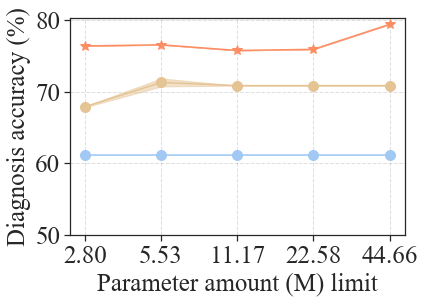

In [19]:
trainset_sizes = [32, 45, 64, 91, 128]

base_folder = 'results/data_vs_batch/scale_transfer'
width_to_parameters_count = np.load(f"../model_diagnosis_dataset/helper/width_to_parameters_count.npy", allow_pickle=True).item()
xticks = [width_to_parameters_count[item] / 1000000 for item in trainset_sizes]

hyper_tree_random = np.load(f'../{base_folder}/hyperparameter_tree_width_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)


plt.plot(range(len(xticks)), mean_values, color=palettes[0], marker=marker_type_lst[0], markersize=10)
plt.fill_between(range(len(xticks)), 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[0])


hyper_tree_random = np.load(f'../{base_folder}/validation_metric_tree_width_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)


plt.plot(range(len(xticks)), mean_values, color=palettes[1], marker=marker_type_lst[0], markersize=10)
plt.fill_between(range(len(xticks)), 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[1])


hyper_tree_random = np.load(f'../{base_folder}/md_tree_width_limit.npy', allow_pickle=True).item()
mean_values = np.mean(hyper_tree_random['test_acc_lst'], axis=1)
std_values = np.std(hyper_tree_random['test_acc_lst'], axis=1)


plt.plot(range(len(xticks)), mean_values, color=palettes[2], marker=marker_type_lst[2], markersize=10)
plt.fill_between(range(len(xticks)), 
                    mean_values-std_values, 
                    mean_values+std_values, 
                    alpha=0.5, 
                    color=palettes[2])

yticks= [0.5, 0.6, 0.7, 0.8]

plt.yticks(yticks, [int(item) for item in 100 * np.array(yticks)] )
plt.xticks(range(len(xticks)), [f"{item:.2f}" for item in xticks], fontsize=25  )
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Diagnosis accuracy (%)', fontsize=25)
plt.xlabel('Parameter amount (M) limit', fontsize=25)